In [1]:
# displays static in notebook
%matplotlib inline  
# displays interactive outside notebook
#%matplotlib   
# displays interactive in notebook
#%matplotlib notebook  


import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import astropy.coordinates as coord
import astropy.units as u

#from astropy import units as u
from astropy.coordinates import SkyCoord

folder = ''

mpl.rcParams['font.family']='serif'
mpl.rcParams['font.size']=14

In [74]:
#constants
c = 2.997E8 #speed of light in meters per second
light_year = 9.46E15 # light-year in meters

#model parameters
dt = 1E6 # years
expansion_rate = 0.01 # per hundred million years
rate_per_year = expansion_rate / 1E8
current_time = 0.0

initial_separation = 5E9 # initial separation, in light-years
current_separation = initial_separation # current separation, in light-years
light_travel_distance = 0.0  # how far light has travelled so far
distance_to_light = initial_separation
distance_from_light_to_target = 0.0 

#arrays for storing data
times = np.array([0])
target_distances = np.array([initial_separation])
light_distances = np.array([initial_separation])
light_target_distances = np.array([0.0])
light_traveled_distances = np.array([0.0])

In [75]:
oh_no_too_far = 0
run_too_long = 0
print(rate_per_year*dt, current_separation * rate_per_year, current_separation * rate_per_year*dt, current_separation + current_separation * rate_per_year*dt)

while ((distance_to_light > 0) and (oh_no_too_far < 1000) and (run_too_long < 10000)):
    #expand space
    current_separation = current_separation + current_separation * rate_per_year*dt
    distance_to_light = distance_to_light + distance_to_light * rate_per_year*dt
    distance_from_light_to_target = distance_from_light_to_target * (1.0+ rate_per_year*dt)
    
    #move light
    distance_from_light_to_target = distance_from_light_to_target + dt
    distance_to_light = distance_to_light - dt
    light_travel_distance = light_travel_distance + dt
    
    #progress clock
    current_time = current_time + dt
    
    #record distances into arrays
    times = np.append(times,current_time)
    target_distances = np.append(target_distances,current_separation)
    light_distances = np.append(light_distances,distance_to_light)
    light_target_distances = np.append(light_target_distances,distance_from_light_to_target)
    light_traveled_distances = np.append(light_traveled_distances,light_travel_distance)
    
    #check for 
    if distance_to_light * rate_per_year >= 1:
        oh_no_too_far = oh_no_too_far + 1
    
    run_too_long = run_too_long + 1
    
print(current_time,oh_no_too_far, run_too_long)

0.0001 0.5 500000.0 5000500000.0
6932000000.0 0 6932


<Figure size 432x288 with 0 Axes>

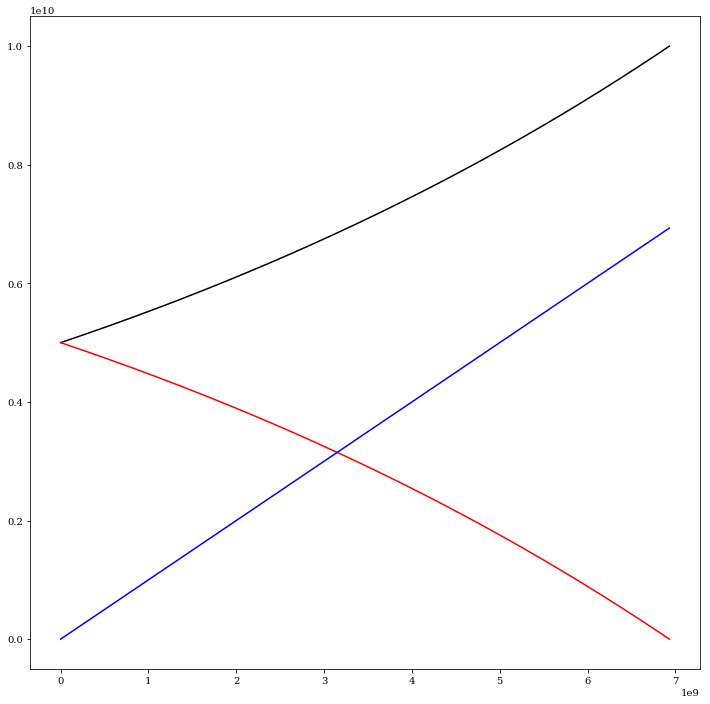

In [76]:
plt.clf()
plt.figure(figsize=(12,12))
#plt.xlim(-2.1,2.1)
#plt.ylim(-2.1,2.1)
#plt.ylim(1.1 * np.min([r2,Y2,0]), 1.1 * np.max([r1,X1,Y1]))
#plt.xlabel('time [years]')

#plt.scatter(t,180.0/np.pi*np.arcsin(np.sin(alpha)), c = 'black', s = 5, edgecolors = 'none')
plt.plot(times,target_distances, c = 'black')
plt.plot(times,light_distances, c = 'red')
plt.plot(times,light_traveled_distances, c = 'blue')



<Figure size 432x288 with 0 Axes>

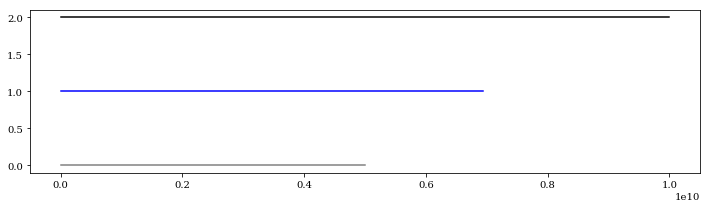

In [78]:
plt.clf()
plt.figure(figsize=(12,3))
#plt.xlim(-2.1,2.1)
#plt.ylim(-2.1,2.1)
#plt.ylim(1.1 * np.min([r2,Y2,0]), 1.1 * np.max([r1,X1,Y1]))
#plt.xlabel('time [years]')

#plt.scatter(t,180.0/np.pi*np.arcsin(np.sin(alpha)), c = 'black', s = 5, edgecolors = 'none')
plt.plot([0,initial_separation],[0,0], c = 'gray')
plt.plot([0,light_travel_distance],[1,1], c = 'blue')
plt.plot([0,current_separation], [2,2], c = 'black')

#plt.ylabel('angles [degrees]')
